<a href="https://colab.research.google.com/github/script-0/FaaS-Traces-Generation/blob/main/FaaS_Traces_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data

In [1]:
!wget https://azurecloudpublicdataset2.blob.core.windows.net/azurepublicdatasetv2/azurefunctions_dataset2019/azurefunctions-dataset2019.tar.xz

--2022-01-27 14:57:50--  https://azurecloudpublicdataset2.blob.core.windows.net/azurepublicdatasetv2/azurefunctions_dataset2019/azurefunctions-dataset2019.tar.xz
Resolving azurecloudpublicdataset2.blob.core.windows.net (azurecloudpublicdataset2.blob.core.windows.net)... 20.38.122.100
Connecting to azurecloudpublicdataset2.blob.core.windows.net (azurecloudpublicdataset2.blob.core.windows.net)|20.38.122.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 142968140 (136M) [application/octet-stream]
Saving to: ‘azurefunctions-dataset2019.tar.xz’

azurefunctions-data 100%[===================>] 136.34M  26.1MB/s    in 5.2s    

2022-01-27 14:57:56 (26.0 MB/s) - ‘azurefunctions-dataset2019.tar.xz’ saved [142968140/142968140]



In [2]:
!tar -xf azurefunctions-dataset2019.tar.xz

# Librairies

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Function Invocation Counts

## Load data

In [5]:
df_invocation = pd.read_csv("invocations_per_function_md.anon.d01.csv")

#Try to load all invocations data => Session crashed due to all available RAM used
#for i in range(2, 15):
#  df = []
#  if(i<10):
#    df = pd.read_csv("invocations_per_function_md.anon.d0"+str(i)+".csv")
#  else:
#    df = pd.read_csv("invocations_per_function_md.anon.d"+str(i)+".csv")
#  df_invocation = pd.concat([df_invocation,df], ignore_index=True)

df_invocation.head()

,HashOwner,HashApp,HashFunction,Trigger,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,...,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439,1440
0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,0d0ac65651f54ae3285a59564d64e39238b516fa1d5b56...,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,orchestration,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,http,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...,http,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Invocated Functions by Events Types in 24 hours

In [10]:
df_trigger = df_invocation['Trigger'].value_counts()

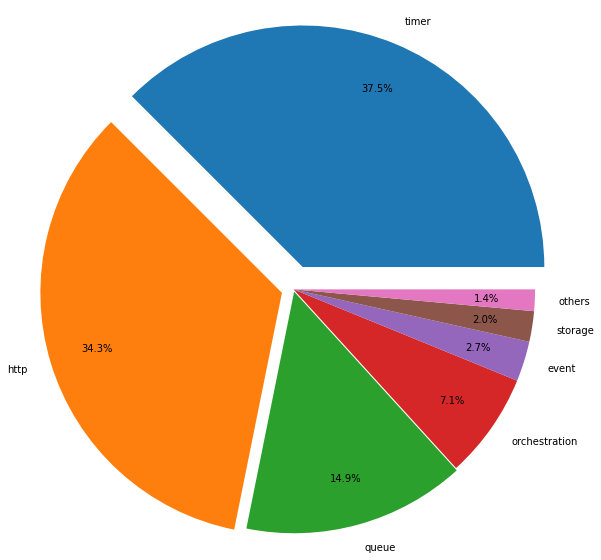

In [50]:
fig1, ax1 = plt.subplots(figsize=(10,10))
pie = ax1.pie(df_trigger.values, labels=df_trigger.keys(), autopct='%1.1f%%', shadow=False, startangle=0,pctdistance=0.8, explode=[0.1,0.05,0.01,0,0,0,0])
ax1.axis('equal')
#ax1.legend()
#ax1.set_title("% Invocated Functions by Events")
plt.show()

## Total Number of Invocations by Functions
See `total_invocations` column

In [61]:
df_invocation_function = pd.DataFrame()
df_invocation_function["HashOwner"] = df_invocation["HashOwner"]
df_invocation_function["HashApp"] = df_invocation["HashApp"]
df_invocation_function["HashFunction"] = df_invocation["HashFunction"]
df_invocation_function["Trigger"] = df_invocation["Trigger"]
df_invocation_function["total_invocations"] = df_invocation["1"]

for i in range(2, 1441):
  df_invocation_function["total_invocations"] += df_invocation[str(i)]

In [62]:
df_invocation_function.head()

,HashOwner,HashApp,HashFunction,Trigger,total_invocations
0,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,7ca324d9fc836a5d4562811c11ce3719530ee919dd1fb9...,520dbd6bd906840012aa0c4b778743efc7c0ac7b7caf96...,http,288
1,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,0d0ac65651f54ae3285a59564d64e39238b516fa1d5b56...,115ca7a2b5bc290052c3da74cd0347d19c3c67b7d5aa66...,http,288
2,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,93e6c664773bbec3a7f50a0e92fa7e97401a802dc6eed8...,orchestration,10
3,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,740c5c767e4b9978ee59a97d1829cfbaf755a47806a311...,http,11
4,71ca12c7af70d021e285b51b245942f8432df6463ff9f2...,a04487a6ba1e14296eb7647e4963180d28bef7a90a8fc5...,c108b4864b866b38b80d0e4594cc6d038f39668b804a1b...,http,9


## Number of Invocations by Event types in 24h

In [63]:
df_invoc_by_event = df_invocation_function.groupby("Trigger")["total_invocations"].sum()

In [64]:
df_invoc_by_event.head()

Trigger
event            299239118
http             195994220
orchestration     11053616
others              781938
queue            378548301
Name: total_invocations, dtype: int64

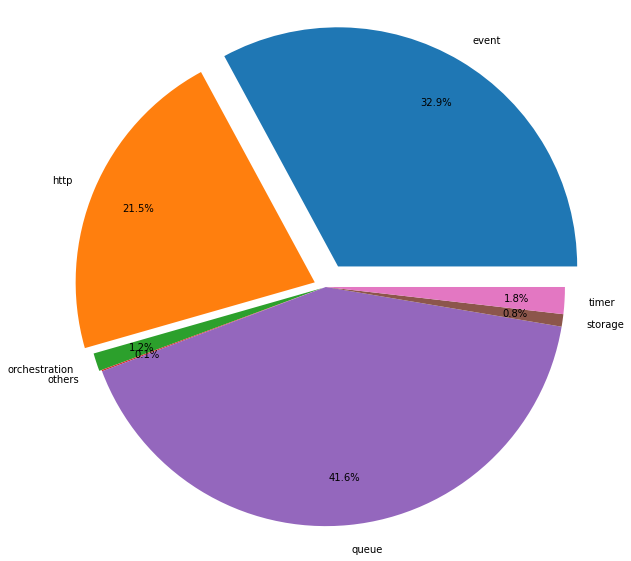

In [65]:
fig1, ax1 = plt.subplots(figsize=(10,10))
pie = ax1.pie(df_invoc_by_event.values, labels=df_invoc_by_event.keys(), autopct='%1.1f%%', shadow=False, startangle=0,pctdistance=0.8, explode=[0.1,0.05,0.01,0,0,0,0])
ax1.axis('equal')
#ax1.legend()
#ax1.set_title("% Invocated Functions by Events")
plt.show()

## Number Invocations by Minutes

In [68]:
invocation_minutes = {}
for i in range(1,1441):
  invocation_minutes[i] = df_invocation[str(i)].sum()

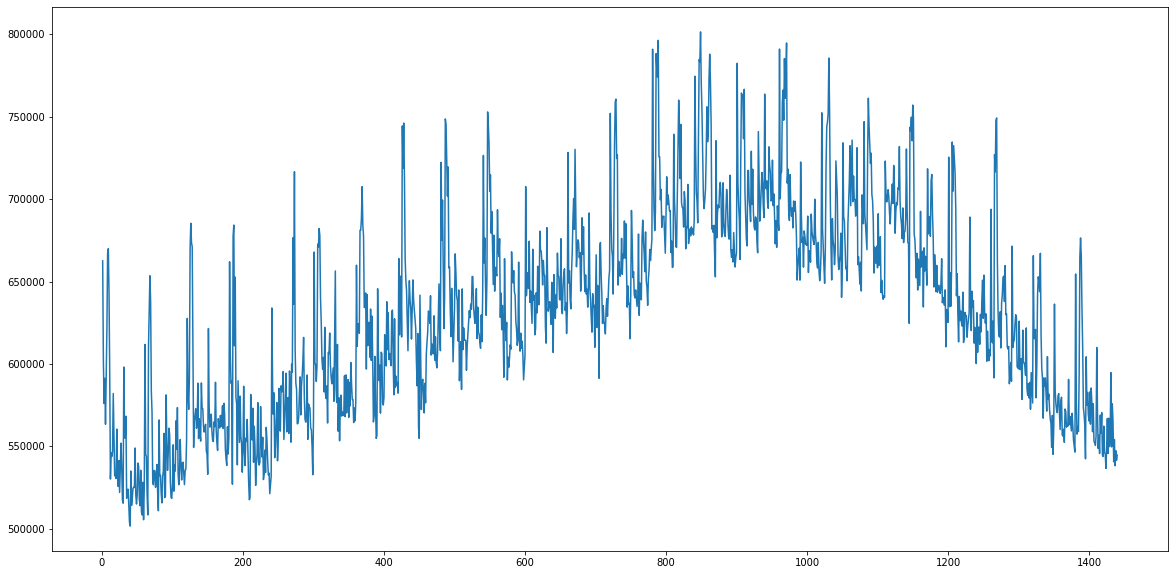

In [81]:
fig1, ax1 = plt.subplots(figsize=(20,10))
plt.plot( list(invocation_minutes.keys()), list(invocation_minutes.values()) )

# Function Execution Duration

In [ ]:
df = pd.read_csv("function_durations_percentiles.anon.d01.csv")
df.head()

,HashOwner,HashApp,HashFunction,Average,Count,Minimum,Maximum,percentile_Average_0,percentile_Average_1,percentile_Average_25,percentile_Average_50,percentile_Average_75,percentile_Average_99,percentile_Average_100
0,5640c1597ef75fa9a7e9c6925022a039a4ba9829241709...,5126901eff078c9a1f5295c859c9327588284a43cc2c0b...,c968871b4ef0123401975d026b85cae2ad7dad9d06ae94...,100,2880,0.0,2595.0,0,0,0,1,1,1376,2595
1,5640c1597ef75fa9a7e9c6925022a039a4ba9829241709...,5126901eff078c9a1f5295c859c9327588284a43cc2c0b...,1bc2d86badd21b18a8533d8e961e52585e5ad1fee0e2c2...,202,365,0.0,2596.0,0,0,1,1,6,2326,2596
2,41d6e09d0f86f5aaa1df842c1ac4f14fbd4dc676bec7e0...,77a93348150f5281c32c9027870a77983ad6eba72e6c28...,b4d7cb9985cd8c1b7fe5ef888bbde1883929e9a5b5d2a6...,11,37815,1.0,3913.0,1,1,3,5,8,155,3146
3,e117b8c1676e11d859824b18fc0202ae8eaa89cb3f58e2...,5c84cc1fbc4261f22d6f626304670979c1f1b94709acc8...,ff612aae7b380ef81ccef063ff814354ee16018af65dc1...,0,34466,0.0,123.0,0,0,0,0,0,1,10
4,3c8c13c6bd162490dae4402bcb9ff1e5c6c14bb21da35a...,3b80dfff065220947f7d626dd6c9176731d3e17591e496...,ee79840da82525548358f4b91d9fa1e550ec7af36bbe3e...,389,288,78.0,5607.0,78,78,109,136,180,4761,5607
